# International Super Market Data Analysis

In [1]:
# install libraries
# pip install -r requirements.txt

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("./data/internationalmarketdata.csv", encoding='latin1')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,5/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,5/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,20-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,18-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [3]:
# Create a copy of the data DataFrame to work with
df = data.copy()

In [4]:
# Display the first 10 rows of the DataFrame to get an overview of the data
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,5/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,5/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,28-06-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,11/7/2011,7/11/2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,14-04-2012,14-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,14-10-2014,14-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,28-01-2012,28-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


In [5]:
# Display the last 5 rows of the DataFrame to examine the end of the dataset
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,20-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,18-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22-05-2012,22-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [6]:
# Display information about the DataFrame, including the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
# Display the shape of the DataFrame to understand its dimensions (rows, columns)
df.shape

(51290, 24)

In [8]:
# Generate descriptive statistics for the DataFrame
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [9]:
# Display descriptive statistics for all columns, including categorical ones
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1430,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,18-06-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,135,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [10]:
# Display the data types of each column in the DataFrame
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [11]:
# Select specific columns with float data types from the DataFrame
float_type = df[['Postal Code', 'Sales', 'Discount', 'Profit', 'Shipping Cost']]
float_type.head()

,Postal Code,Sales,Discount,Profit,Shipping Cost
0,10024.0,2309.650,0.0,762.1845,933.57
1,NaN,3709.395,0.1,-288.7650,923.63
2,NaN,5175.171,0.1,919.9710,915.49
3,NaN,2892.510,0.1,-96.5400,910.16
4,NaN,2832.960,0.0,311.5200,903.04


In [12]:
# Select specific columns with non-float data types from the DataFrame
else_type = df[['Row ID','Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country']]
else_type.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country
0,32298,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States
1,26341,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia
2,25330,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia
3,13524,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany
4,47221,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal


In [13]:
# Select columns containing date information from the DataFrame
date_type = df[['Order Date', 'Ship Date']]
date_type.head()

,Order Date,Ship Date
0,31-07-2012,31-07-2012
1,2/5/2013,5/2/2013
2,17-10-2013,17-10-2013
3,28-01-2013,28-01-2013
4,11/5/2013,5/11/2013


In [14]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format, handling mixed formats and coercing errors
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

In [15]:
# Display the number of unique values for each column in the DataFrame
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1430
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [16]:
# Display the data types of each column in the DataFrame after converting date columns to datetime format
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [17]:
# Display the column names of the DataFrame
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [18]:
# Convert specific columns to the 'category' data type to optimize memory usage and improve performance
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Market'] = df['Market'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Order Priority'] = df['Order Priority'].astype('category')

In [19]:
# Display the updated information about the DataFrame after data type conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

### Data Cleaning

In [20]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [21]:
# Check for missing values in the DataFrame and count them for each column
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [22]:
# Display the shape of the DataFrame to understand its dimensions (rows, columns)
df.shape

(51290, 24)

In [23]:
# Display the number of unique values for each column in the DataFrame
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1430
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [24]:
# Calculate the mode of the 'Postal Code' column and store it in the variable 'postal_code_mode'
postal_code_mode = df['Postal Code'].mode()[0]
postal_code_mode

np.float64(10035.0)

In [25]:
# Fill missing values in the 'Postal Code' column with the mode and convert the column to integer type
df['Postal Code'] = df['Postal Code'].fillna(postal_code_mode)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Postal Code'].head(30)

0     10024
1     10035
2     10035
3     10035
4     10035
5     10035
6     10035
7     10035
8     95823
9     28027
10    22304
11    10035
12    10035
13    10035
14    10035
15    10035
16    42420
17    10035
18    10035
19    10035
20    10035
21    60610
22    10035
23    10035
24    10035
25    10035
26    10035
27    10035
28    90008
29    10035
Name: Postal Code, dtype: int64

In [26]:
# Recheck for missing values after filling the 'Postal Code' column
df['Postal Code'].isnull().sum()

np.int64(0)

In [27]:
# Display the column names of the DataFrame
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [28]:
# Check if the 'Sales' column contains only non-negative values
sales_nagetive = df['Sales'] >= 0
sales_nagetive

0        True
1        True
2        True
3        True
4        True
         ... 
51285    True
51286    True
51287    True
51288    True
51289    True
Name: Sales, Length: 51290, dtype: bool

In [29]:
# Filter the DataFrame to identify rows where the 'Sales' column has negative values
nagetive_sales = df[df['Sales'] < 0]
if not nagetive_sales.empty:
    print(nagetive_sales)
nagetive_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [30]:
# Filter the DataFrame to identify rows where the 'Profit' column has negative values
nagetive_profit = df[df['Profit'] < 0]
if not nagetive_profit.empty:
    print("nagetive value is 'Profit'")
    display(nagetive_profit.head(20))

nagetive value is 'Profit'


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,26341,IN-2013-77878,2013-02-05,2013-05-02,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.3950,9,0.10,-288.7650,923.63,Critical
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.5100,5,0.10,-96.5400,910.16,Medium
9,40936,CA-2012-116638,2012-01-28,2012-01-28,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.6440,13,0.40,-1862.3124,865.74,Critical
30,220,US-2011-128776,2011-12-28,2011-12-28,Second Class,RR-19525,Rick Reed,Corporate,Santo Domingo,Santo Domingo,...,TEC-PH-10002815,Technology,Phones,"Samsung Smart Phone, VoIP",1696.6400,5,0.20,-148.4600,704.06,Critical
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.4300,5,0.30,-350.4900,690.42,High
37,31980,US-2014-168116,2014-11-05,2014-05-11,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.9800,4,0.50,-3839.9904,674.82,High
40,21316,ID-2013-63976,2013-08-22,2013-08-22,Standard Class,JB-16000,Joy Bell-,Consumer,Mataram,Nusa Tenggara Barat,...,TEC-PH-10000499,Technology,Phones,"Motorola Smart Phone, Full Size",3200.5962,6,0.17,-77.2038,660.87,High
73,21209,IN-2014-30110,2014-08-26,2014-08-26,First Class,LA-16780,Laura Armstrong,Corporate,Palembang,Sumatera Selatan,...,FUR-TA-10000687,Furniture,Tables,"Bevis Conference Table, with Bottom Storage",3427.1496,7,0.47,-452.8104,586.57,High
83,38540,CA-2014-118892,2014-08-18,2014-08-18,Second Class,TP-21415,Tom Prescott,Consumer,Philadelphia,Pennsylvania,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.1740,9,0.30,-630.8820,566.65,Medium
85,23013,ID-2012-78207,2012-09-18,2012-09-18,Second Class,AM-10705,Anne McFarland,Consumer,Bandung,Jawa Barat,...,OFF-AP-10001621,Office Supplies,Appliances,"Hamilton Beach Refrigerator, Black",2487.8088,6,0.17,-269.7912,562.14,Critical


In [31]:
# Calculate the mean of positive profits and replace negative profits with the mean value
mean_profit = df[df['Profit'] >= 0]['Profit'].mean()
data.loc[data['Profit'] < 0, 'Profit'] = mean_profit
mean_profit

np.float64(61.634838357507874)

In [32]:
# Display the first 20 rows of the 'Profit' column from the 'data' DataFrame
data['Profit'].head(10)

0     762.184500
1      61.634838
2     919.971000
3      61.634838
4     311.520000
5     763.275000
6     564.840000
7     996.480000
8    1906.485000
9      61.634838
Name: Profit, dtype: float64

In [33]:
# Replace negative values in the 'Profit' column with the mean profit value using 'lambda' function
df['Profit'] = df['Profit'].apply(lambda x: mean_profit if x < 0 else x)

In [34]:
print("nagetive value in 'Profit' have been replaced with the mean of non-nagetive profits.")
df['Profit'].head(10)

nagetive value in 'Profit' have been replaced with the mean of non-nagetive profits.


0     762.184500
1      61.634838
2     919.971000
3      61.634838
4     311.520000
5     763.275000
6     564.840000
7     996.480000
8    1906.485000
9      61.634838
Name: Profit, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     51290 non-null  int64         
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

### Segment in Data

In [36]:
segment_data = df[['Customer ID', 'Customer Name', 'Category', 'Product Name', 'Sub-Category', 'Sales', 'Profit', 'Quantity', 'Discount', 'Order Date', 'City', 'State', 'Region', 'Market', 'Order Priority']]
segment_data.head()

,Customer ID,Customer Name,Category,Product Name,Sub-Category,Sales,Profit,Quantity,Discount,Order Date,City,State,Region,Market,Order Priority
0,RH-19495,Rick Hansen,Technology,Plantronics CS510 - Over-the-Head monaural Wir...,Accessories,2309.650,762.184500,7,0.0,2012-07-31,New York City,New York,East,US,Critical
1,JR-16210,Justin Ritter,Furniture,"Novimex Executive Leather Armchair, Black",Chairs,3709.395,61.634838,9,0.1,2013-02-05,Wollongong,New South Wales,Oceania,APAC,Critical
2,CR-12730,Craig Reiter,Technology,"Nokia Smart Phone, with Caller ID",Phones,5175.171,919.971000,9,0.1,2013-10-17,Brisbane,Queensland,Oceania,APAC,Medium
3,KM-16375,Katherine Murray,Technology,"Motorola Smart Phone, Cordless",Phones,2892.510,61.634838,5,0.1,2013-01-28,Berlin,Berlin,Central,EU,Medium
4,RH-9495,Rick Hansen,Technology,"Sharp Wireless Fax, High-Speed",Copiers,2832.960,311.520000,8,0.0,2013-11-05,Dakar,Dakar,Africa,Africa,Critical


## Sales and Profit Analysis

1. What is the trend of sales and profit over time?
2. Which regions and market contribute the most to sales and profit?
3. Which cities and states are most profitable?
4. Which products are the most popular (Highest quantity sold)?
5. What is the sales and profit distribution across different market?

### Q1. What is the trend of sales and profit over time?

In [37]:
# Make an explicit copy
segment_data = segment_data.copy()

# Extract year
segment_data['Year'] = segment_data['Order Date'].dt.year

# Group by year and calculate total sales and profit
sales_profit_trend = segment_data.groupby('Year')[['Sales', 'Profit']].sum()

# Display result
print(sales_profit_trend)

             Sales        Profit
Year                            
2011  2.259451e+06  5.552016e+05
2012  2.677439e+06  6.684937e+05
2013  3.405746e+06  8.575934e+05
2014  4.299866e+06  1.079962e+06


In [49]:
# Create a line chart to visualize the trend of sales and profit over time using plotly 
fig = go.Figure()

# Sales Line
fig.add_trace(go.Scatter(
    x=sales_profit_trend.index,   # X-axis values: Date or Year
    y=sales_profit_trend['Sales'], # Y-axis: Sales values
    mode='lines+markers', # Connect points with lines and show markers (dots)
    name='Sales', # Legend label
    line=dict(color='#1f77b4', width=2.5) # Line style (blue, thickness 2.5)
))

# Profit Line
fig.add_trace(go.Scatter(
    x=sales_profit_trend.index,  # X-axis values: Date or Year
    y=sales_profit_trend['Profit'], # Y-axis: Sales values
    mode='lines+markers', # Connect points with lines and show markers (dots)
    name='Profit', # Legend label
    line=dict(color='#2ca02c', width=2.5) # Line style (blue, thickness 2.5)
))

# Layout and Styling
fig.update_layout(
    title='Sales and Profit Trend over Time', # Adds a main title
    title_font=dict(size=24, color='darkblue'), # Makes the title big and blue
    xaxis_title='Year', # Label of x-axes
    yaxis_title='Amount ($)', # Label of y-axes
    legend=dict(font=dict(size=16)),  # Sets font size for the legend
    template='plotly_white', # Gives a clean white background
    width=1000, # Figure size (width)
    height=600 # Figur size (height)
)

fig.show()

```markdown
## Sales and Profit Report

The above chart illustrates the trend of sales and profit over the years 2011 to 2014. It shows a steady increase in both sales and profit, with the highest values recorded in 2014. This indicates consistent business growth and improved profitability over time.
```

### Q2. Which regions and market contribute the most to sales and profit?

In [ ]:
# Group the data by 'Region' and 'Market', then calculate the total 'Sales' and 'Profit' for each group
region_market_sales_profit = segment_data.groupby(['Region', 'Market'], observed=False)[['Sales','Profit']].sum()
top_region_sales = region_market_sales_profit.sort_values(by='Sales', ascending=False)
top_market_sales = region_market_sales_profit.sort_values(by='Profit', ascending=False)

In [ ]:
# Display the top 5 regions by total sales
print("Top Region by Sales")
top_region_sales[['Sales']].head()

Top Region by Sales


,,Sales
Region,Market,
Central,EU,1.720553e+06
Oceania,APAC,1.100185e+06
Southeast Asia,APAC,8.844232e+05
North Asia,APAC,8.483098e+05
EMEA,EMEA,8.061613e+05


In [ ]:
# Display the top 5 markets by total profit
print("Top Market by Profit")
top_market_sales[['Profit']].head()

Top Market by Profit


,,Profit
Region,Market,
Central,EU,380670.456092
EMEA,EMEA,265949.434402
Oceania,APAC,241333.589821
Africa,Africa,241230.547508
Southeast Asia,APAC,210130.967780


Text(0, 0.5, 'Amount ($)')

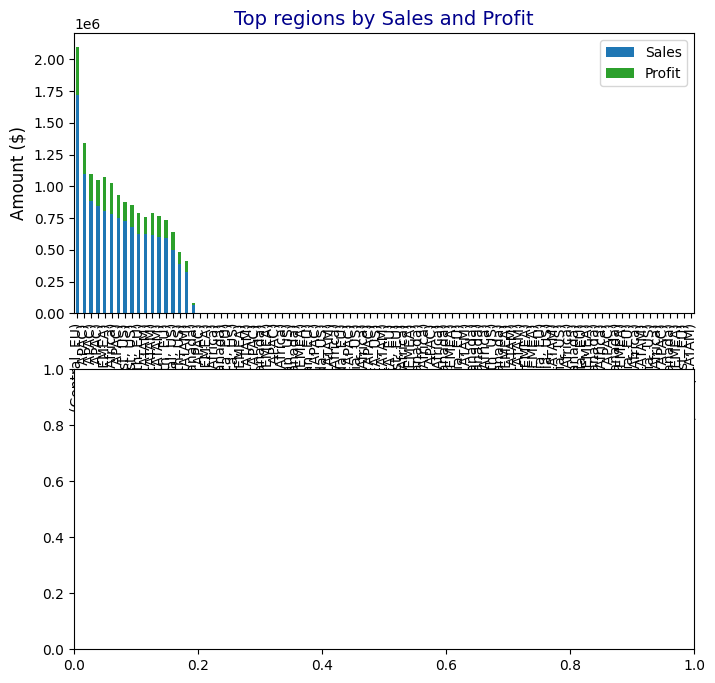

In [ ]:
# create subplot
fig, ax = plt.subplots(2, 1, figsize=(8,8))

# ploting sales by Region (Stacked Bar Chart)
top_region_sales[['Sales','Profit']].plot(kind='bar', stacked=True, ax=ax[0], color=['#1f77b4','#2ca02c'])
ax[0].set_title('Top regions by Sales and Profit', fontsize=14, color='darkblue')
ax[0].set_xlabel('Region', fontsize=12)
ax[0].set_ylabel('Amount ($)', fontsize=12)

# ploting sales by Market (Stacked Bar Chart)

